In [6]:
#see other examples here
#https://github.com/AustinLBuchanan/Combinatorial-Optimization-in-Gurobi

import networkx as nx

Number of vertices: 34
Number of edges: 78
Vertices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


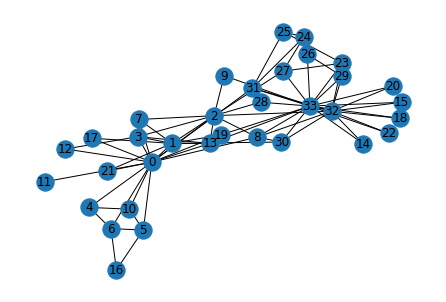

In [15]:
# Create a graph and visualize it
#G = nx.florentine_families_graph()
#G = nx.les_miserables_graph()
G = nx.karate_club_graph()

import matplotlib.pyplot as plt
nx.draw(G,with_labels=True)

print("Number of vertices:",G.number_of_nodes())
print("Number of edges:",G.number_of_edges())
print("Vertices:",G.nodes)

In [21]:
import random
random.seed()

#print(random.randint(3, 9))

In [27]:
# DG is directed version of G. Replaces each edge {i,j} by (i,j) and (j,i)
DG = nx.DiGraph(G)

# Suppose rnadom arc costs
c = { (i,j) : random.randint(1, 3) for (i,j) in DG.edges }

# Suppose unit arc costs
c = { (i,j) : 1 for (i,j) in DG.edges }

#s = "Strozzi"  # path start
#t = "Ginori"   # path end

#s="Napoleon" # path start
#t = "Babet"   # path end

s=11  # path start
t =26 # path end



In [28]:
import gurobipy as gp
from gurobipy import GRB

In [29]:
# Create model object
m = gp.Model()

# Create variable for each edge
x = m.addVars( DG.edges )

# Objective function: minimize cost of selected edges
m.setObjective( gp.quicksum( c[i,j] * x[i,j] for i,j in DG.edges ), GRB.MINIMIZE )

# Add flow-balance constraints at all nodes (besides s and t)
m.addConstrs( gp.quicksum( x[j,i] - x[i,j] for j in DG.neighbors(i) ) == 0 for i in G.nodes if i not in {s,t} )

# Must leave node s, and must not enter s
m.addConstr( gp.quicksum( x[s,j] for j in DG.neighbors(s) ) == 1 )
m.addConstr( gp.quicksum( x[i,s] for i in DG.neighbors(s) ) == 0 )

# Solve
m.optimize()

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i9-12900K, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 34 rows, 156 columns and 308 nonzeros
Model fingerprint: 0x88c39e10
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 12 rows and 40 columns
Presolve time: 0.00s
Presolved: 22 rows, 116 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+00   1.000000e+00   0.000000e+00      0s
      20    4.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 20 iterations and 0.00 seconds (0.00 work units)
Optimal objective  4.000000000e+00


In [30]:
#https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html

#nx.set_edge_attributes(G, ew, "weight")

for i,j in DG.edges: 
    DG.edges[i, j]["weight"]=c[i,j]
    #print(G.edges[i, j]["weight"])
    

test=nx.shortest_path(DG, source=s, target=t, weight="weight", method='dijkstra')

length=0

for i in range(1,len(test)): 
    print(test[i-1],test[i],c[test[i-1],test[i]])
    length+=c[test[i-1],test[i]]

length
#for i in test:
#    k=i

11 0 1
0 8 1
8 33 1
33 26 1


4

[(0, 8), (8, 33), (11, 0), (33, 26)]


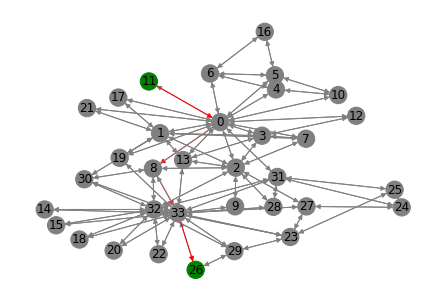

In [31]:
# Visualize the solution
#https://networkx.org/documentation/stable/reference/drawing.html
    
path_edges = [ (i,j) for i,j in DG.edges if x[i,j].x > 0.9 ]

print(path_edges)

edge_colors = [ "red" if i in path_edges else "gray" for i in DG.edges ]
node_colors = [ "green" if i in {s,t} else "gray" for i in DG.nodes ]

nx.draw_kamada_kawai( DG, with_labels=True, edge_color=edge_colors, node_color=node_colors )
#nx.draw_circular( DG, with_labels=True, edge_color=edge_colors, node_color=node_colors )